# Import required libraries

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis (EDA)

In [22]:
# Load dataset
data = pd.read_csv("Breast_Cancer.csv")
data

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [23]:
# Check for missing values
print("Missing values:")
print(data.isna().sum())

Missing values:
Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Regional Node Positive    0
Survival Months           0
Status                    0
dtype: int64


In [24]:
# Check if there are duplicate rows
data.duplicated().sum()

1

In [25]:
# Show all duplicate lines
duplicate_rows = data[data.duplicated(keep=False)]
print(duplicate_rows)

     Age   Race Marital Status T Stage  N Stage 6th Stage  \
213   63  White        Married       T1      N1       IIA   
436   63  White        Married       T1      N1       IIA   

                 differentiate Grade   A Stage  Tumor Size Estrogen Status  \
213  Moderately differentiated     2  Regional          17        Positive   
436  Moderately differentiated     2  Regional          17        Positive   

    Progesterone Status  Regional Node Examined  Regional Node Positive  \
213            Positive                       9                       1   
436            Positive                       9                       1   

     Survival Months Status  
213               56  Alive  
436               56  Alive  


In [26]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [27]:
# View the overall information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4023 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4023 non-null   int64 
 1   Race                    4023 non-null   object
 2   Marital Status          4023 non-null   object
 3   T Stage                 4023 non-null   object
 4   N Stage                 4023 non-null   object
 5   6th Stage               4023 non-null   object
 6   differentiate           4023 non-null   object
 7   Grade                   4023 non-null   object
 8   A Stage                 4023 non-null   object
 9   Tumor Size              4023 non-null   int64 
 10  Estrogen Status         4023 non-null   object
 11  Progesterone Status     4023 non-null   object
 12  Regional Node Examined  4023 non-null   int64 
 13  Regional Node Positive  4023 non-null   int64 
 14  Survival Months         4023 non-null   int64 
 15  Status   

In [28]:
# Print the number of unique values for each column
for col in data.columns:
    print(f'{col} has {data[col].nunique()} values')

Age has 40 values
Race has 3 values
Marital Status has 5 values
T Stage  has 4 values
N Stage has 3 values
6th Stage has 5 values
differentiate has 4 values
Grade has 4 values
A Stage has 2 values
Tumor Size has 110 values
Estrogen Status has 2 values
Progesterone Status has 2 values
Regional Node Examined has 54 values
Regional Node Positive has 38 values
Survival Months has 107 values
Status has 2 values


In [29]:
# Classify columns: categorical columns and numerical columns
# Categorical columns: if the number of unique values is 5 or fewer
cat_cols = [col for col in data.columns if data[col].nunique() <= 5]
# Numerical columns: if the number of unique values is 6 or more
num_cols = [col for col in data.columns if data[col].nunique() >= 6]

In [30]:
len(cat_cols)

11

In [31]:
len(num_cols)

5

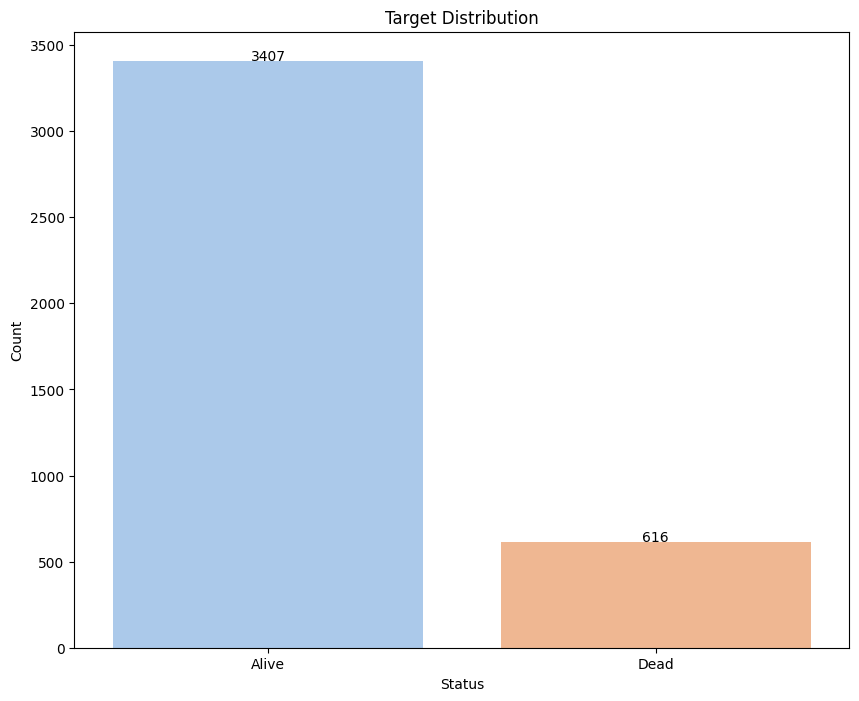

In [32]:
# Target distribution
# Set the figure size and create a count plot
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='Status', data=data, palette='pastel')

# Add labels to each bar in the plot
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 3, f'{int(p.get_height())}', ha="center")

plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Target Distribution')
plt.show()

In [33]:
# View the specific values in the categorical columns
for col in cat_cols:
    print(f'{col} has {data[col].unique()} values')

Race has ['White' 'Black' 'Other'] values
Marital Status has ['Married' 'Divorced' 'Single ' 'Widowed' 'Separated'] values
T Stage  has ['T1' 'T2' 'T3' 'T4'] values
N Stage has ['N1' 'N2' 'N3'] values
6th Stage has ['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB'] values
differentiate has ['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated'] values
Grade has ['3' '2' '1' ' anaplastic; Grade IV'] values
A Stage has ['Regional' 'Distant'] values
Estrogen Status has ['Positive' 'Negative'] values
Progesterone Status has ['Positive' 'Negative'] values
Status has ['Alive' 'Dead'] values


In [34]:
# Clean 'Marital Status' column by removing extra spaces
data['Marital Status'] = data['Marital Status'].str.strip()

# Rename 'Grade' column values
data['Grade'] = data['Grade'].replace({
    '3': 'Grade III',
    '2': 'Grade II',
    '1': 'Grade I',
    ' anaplastic; Grade IV': 'Grade IV'
})

# Rename 'differentiate' column values for better visualization
data['differentiate'] = data['differentiate'].replace({
    'Poorly differentiated': 'Poor',
    'Moderately differentiated': 'Moderate',
    'Well differentiated': 'Well',
    'Undifferentiated': 'Undiff'
})

In [35]:
# View the specific values in the categorical columns
for col in cat_cols:
    print(f'{col} has {data[col].unique()} values')

Race has ['White' 'Black' 'Other'] values
Marital Status has ['Married' 'Divorced' 'Single' 'Widowed' 'Separated'] values
T Stage  has ['T1' 'T2' 'T3' 'T4'] values
N Stage has ['N1' 'N2' 'N3'] values
6th Stage has ['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB'] values
differentiate has ['Poor' 'Moderate' 'Well' 'Undiff'] values
Grade has ['Grade III' 'Grade II' 'Grade I' 'Grade IV'] values
A Stage has ['Regional' 'Distant'] values
Estrogen Status has ['Positive' 'Negative'] values
Progesterone Status has ['Positive' 'Negative'] values
Status has ['Alive' 'Dead'] values


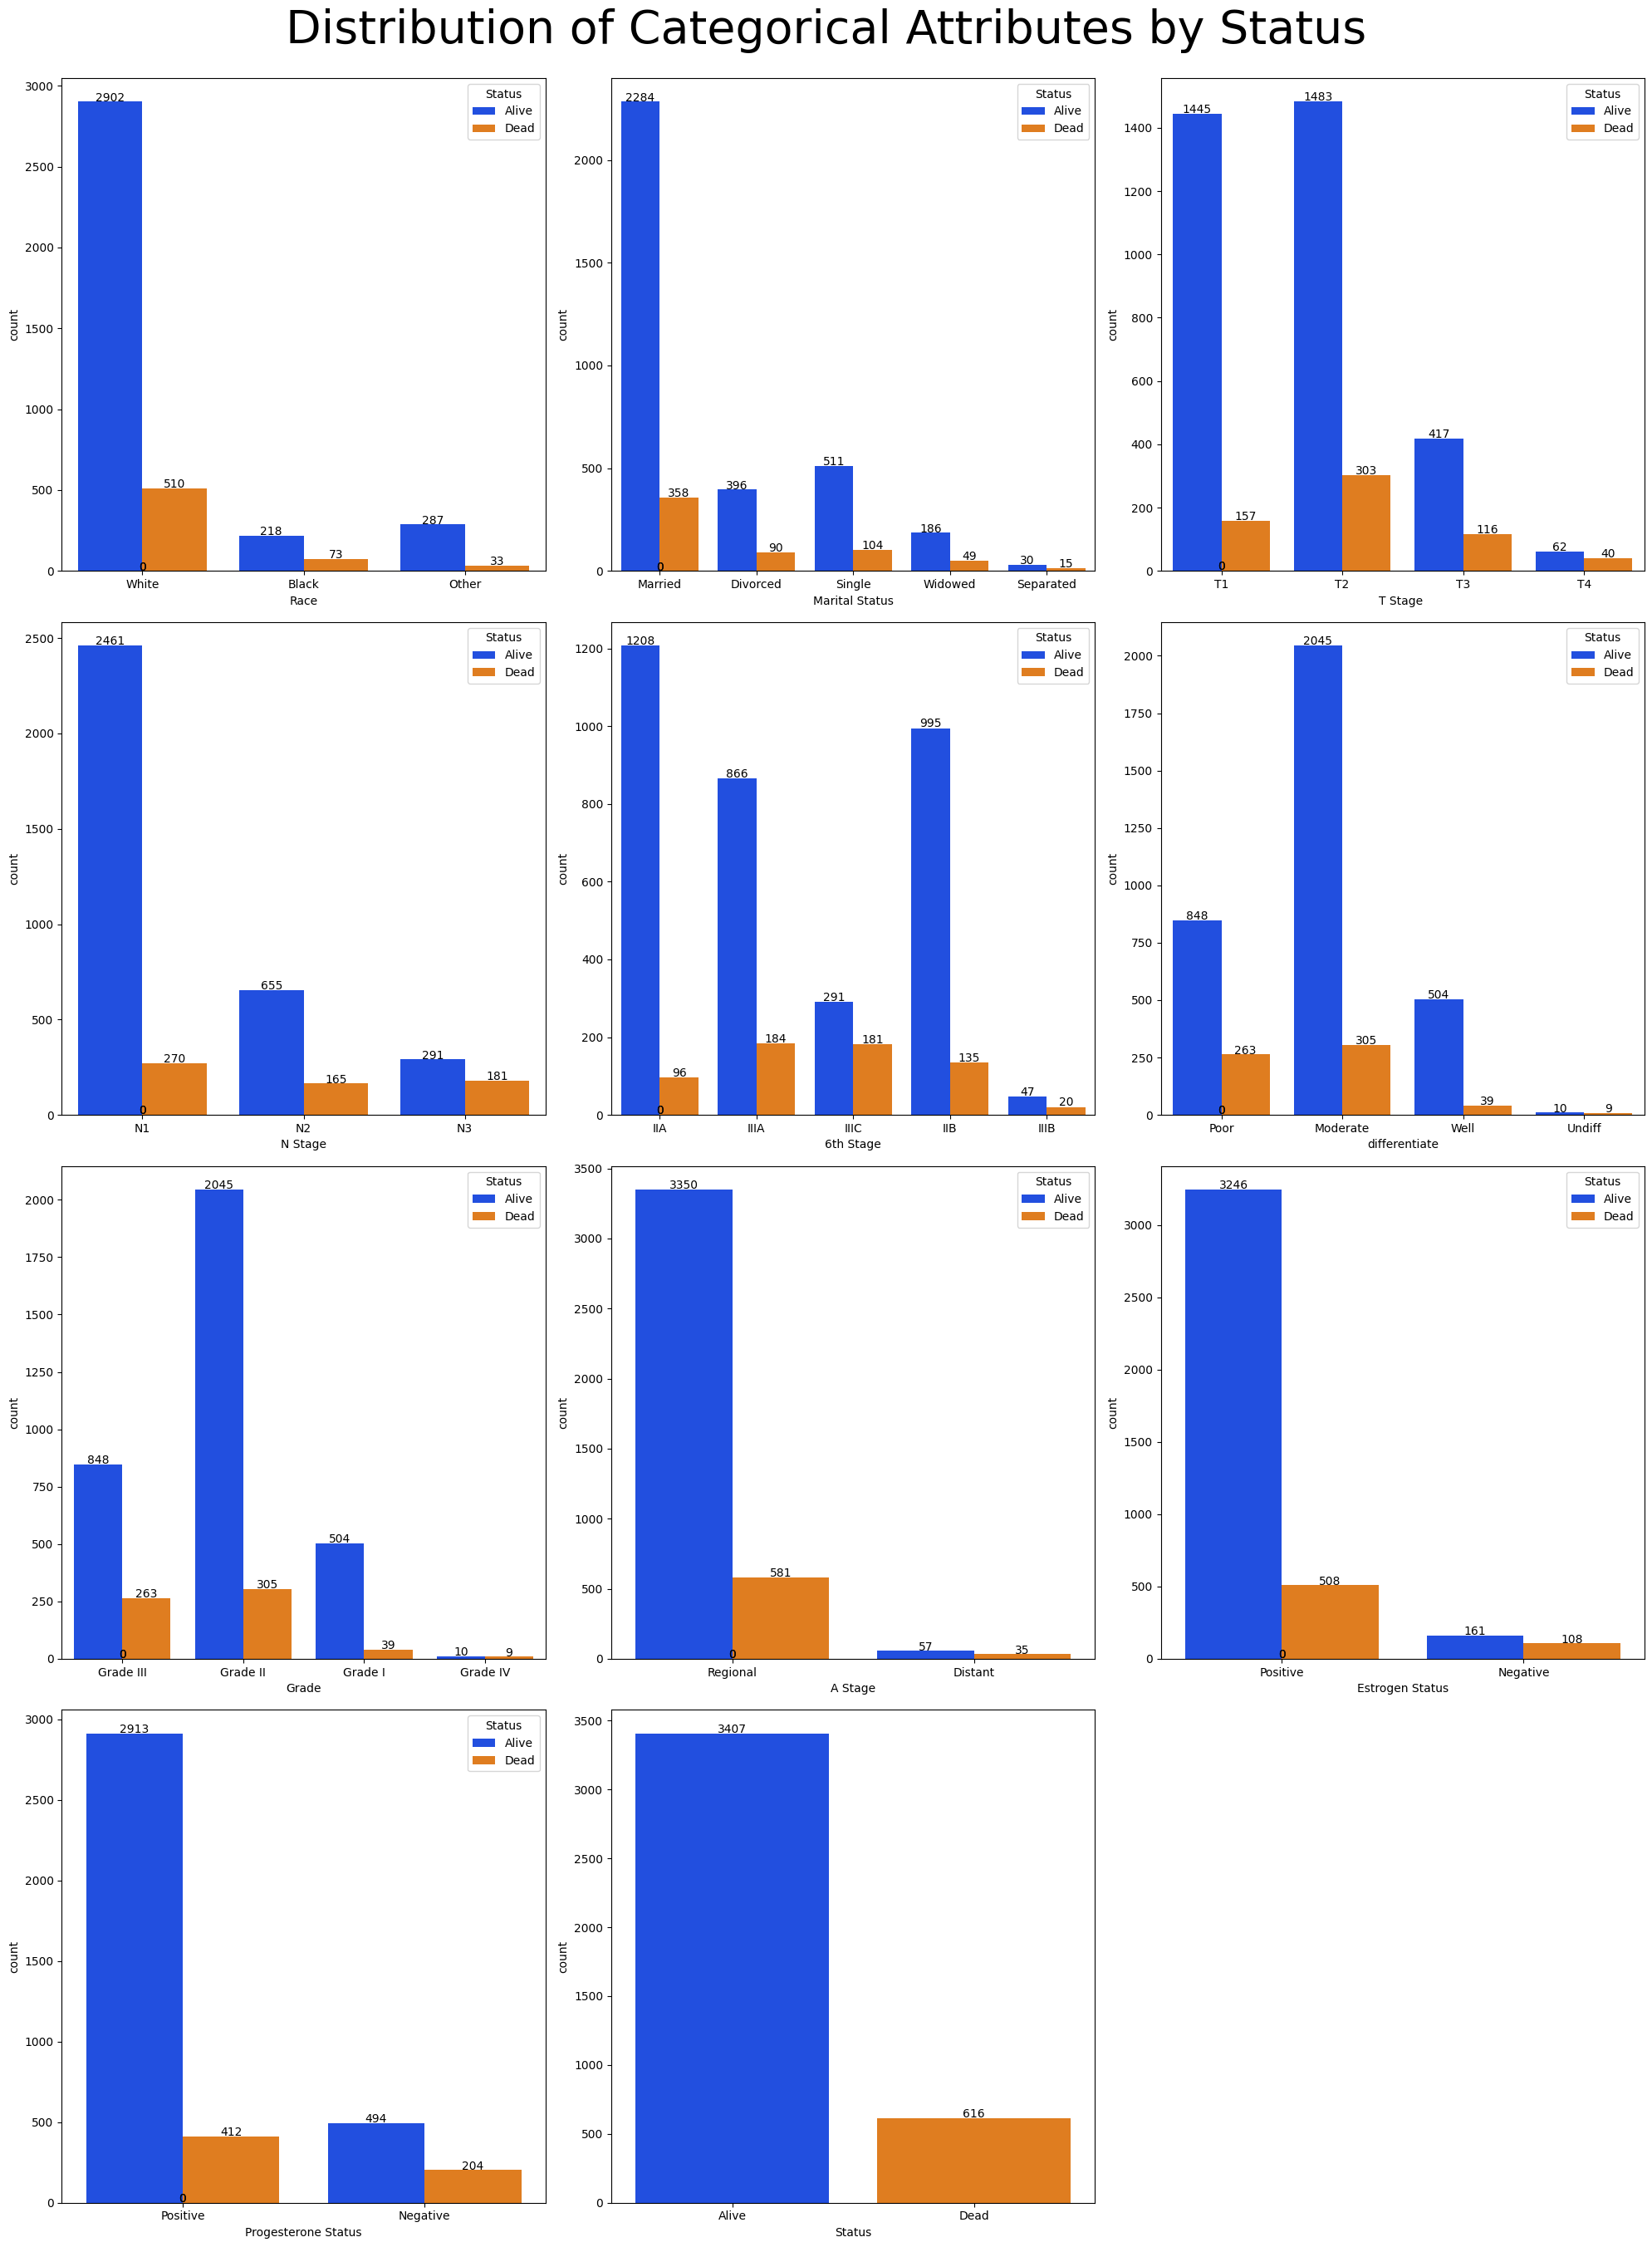

In [36]:
plt.figure(figsize=(20, 27))
plotnumber = 1

# Loop through each column in the dataframe
for col in cat_cols:
    if plotnumber <= len(cat_cols):
        plt.subplot(4, 3, plotnumber)
        ax = sns.countplot(x=data[col], hue=data['Status'], palette='bright')

        # Add labels to each bar in the plot
        for p in ax.patches:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 3, f'{int(p.get_height())}', ha="center")

    plotnumber += 1

plt.suptitle('Distribution of Categorical Attributes by Status', fontsize=40, y=1)
plt.tight_layout()
plt.show()

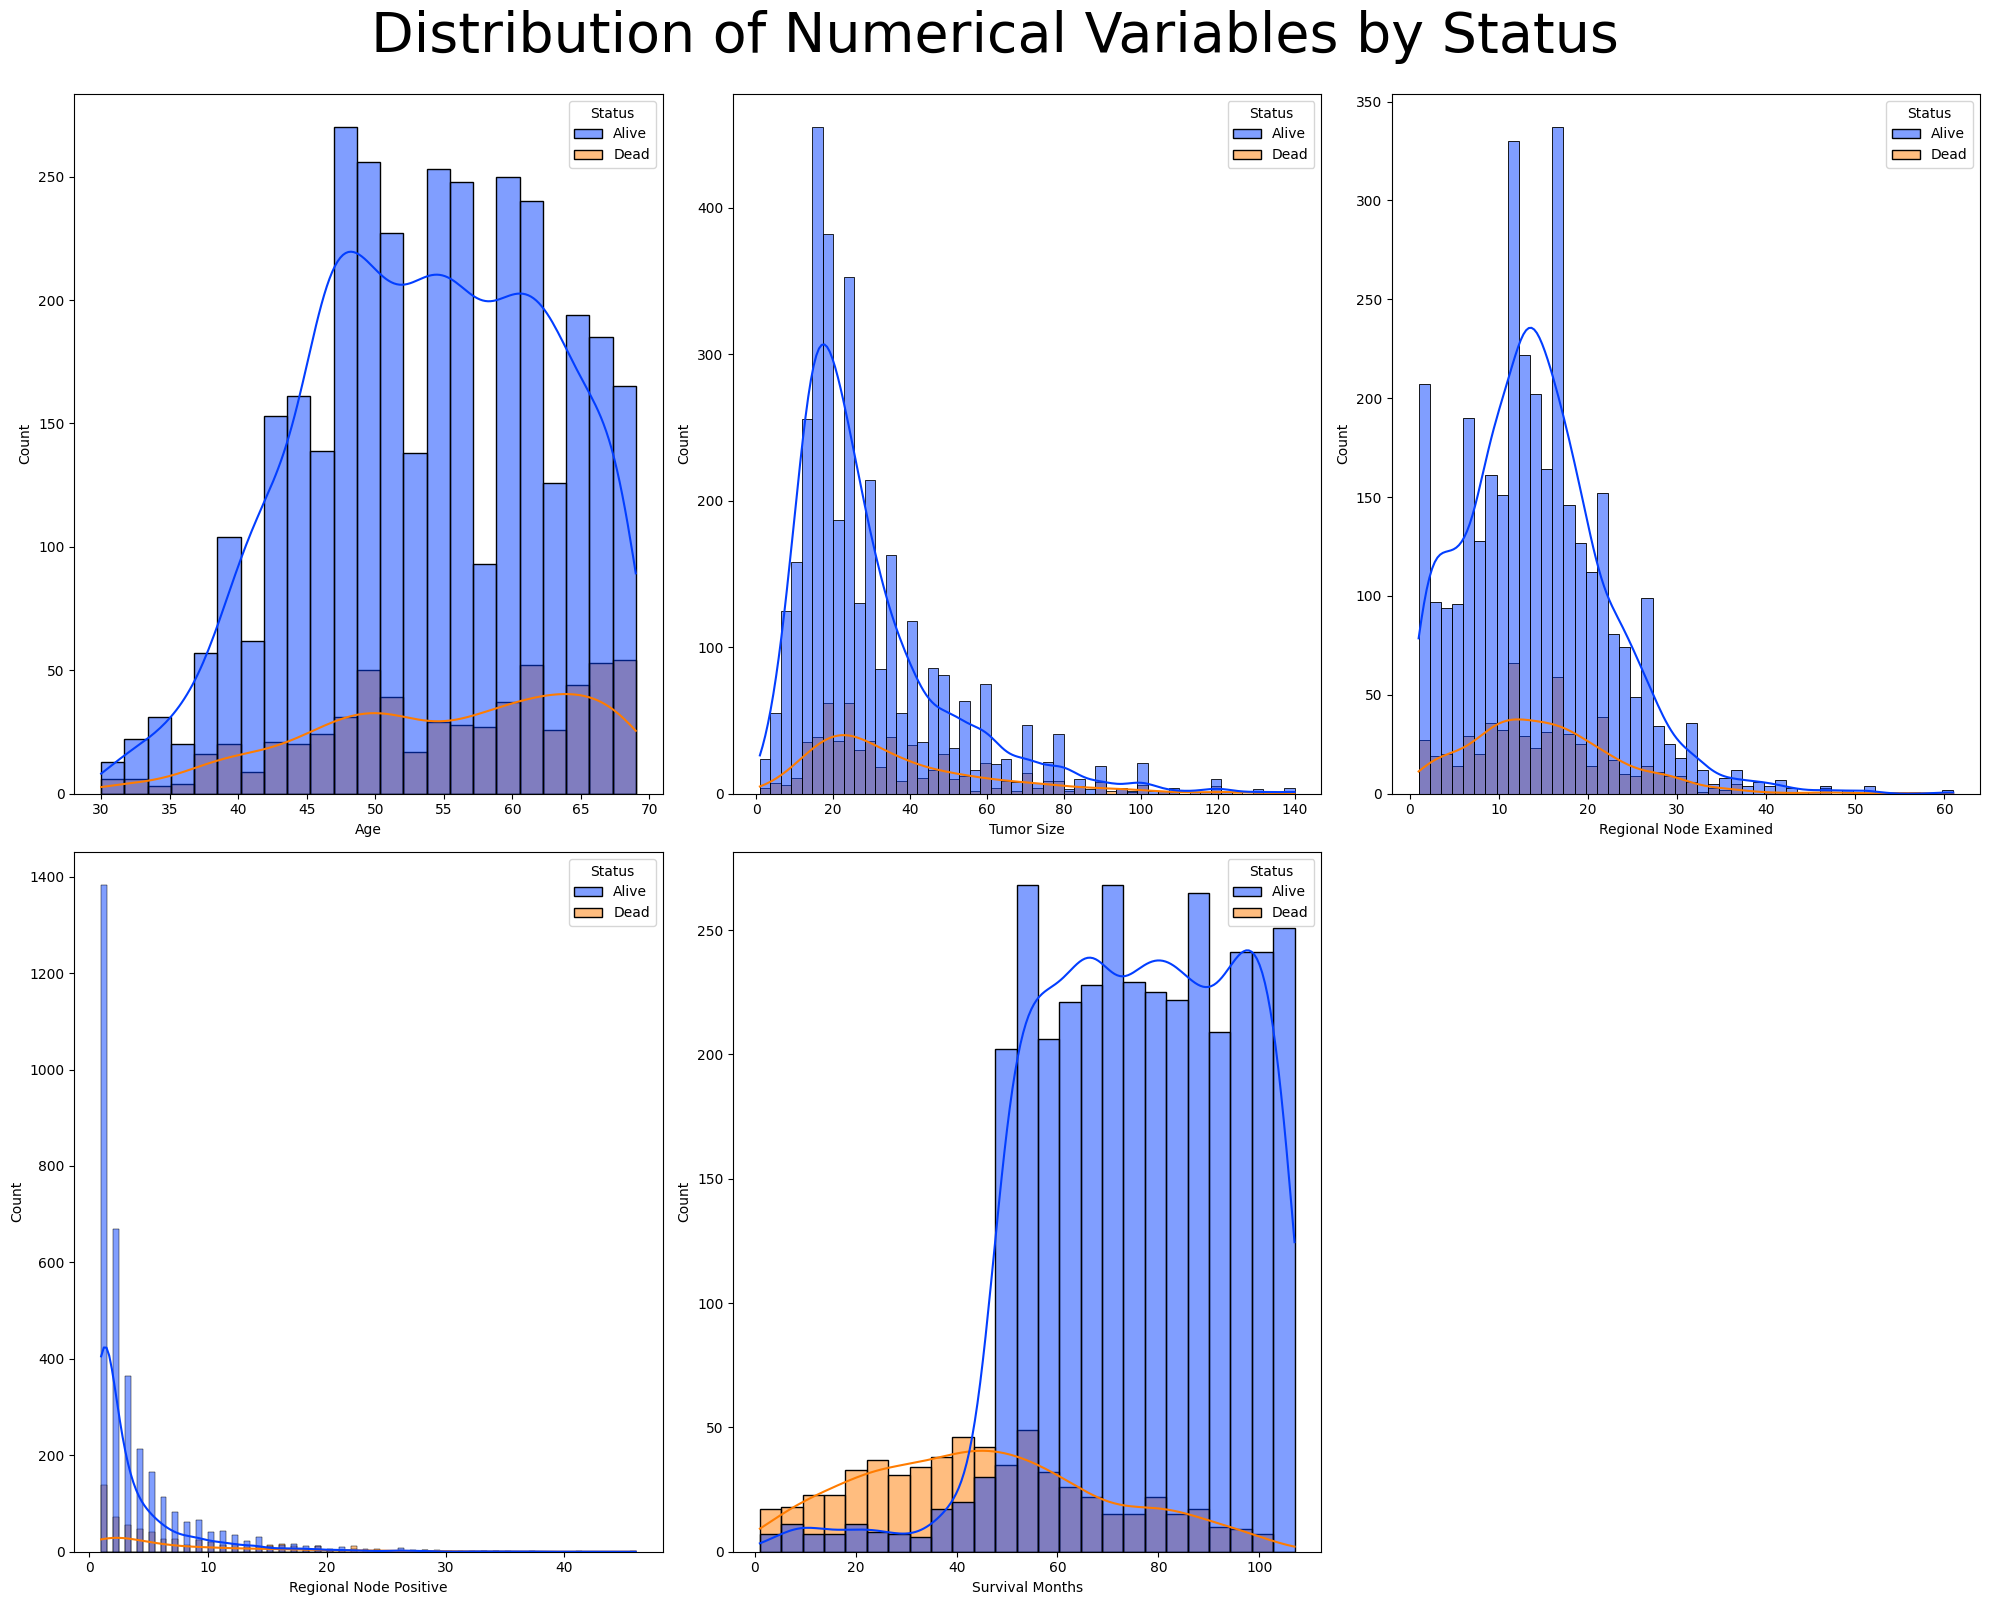

In [37]:
plt.figure(figsize=(20, 16))
plotnumber = 1

# Loop through each column in the dataframe
for col in num_cols:
    plt.subplot(2, 3, plotnumber)
    sns.histplot(data=data, x=col, hue='Status', kde=True, palette='bright')  # Use 'hue' to differentiate by target
    plt.xlabel(col)
    plotnumber += 1

# Set the main title and adjust layout
plt.suptitle('Distribution of Numerical Variables by Status', fontsize=40, y=1)
plt.tight_layout()
plt.show()

# Data Preprocessing

In [38]:
# Feature encoding (label encoding)
# Convert categories to numeric values ​​using category labels
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

# Select features and target
X = data.drop(columns=['Status'])  # Features
y = data['Status']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection

In [39]:
# Build Naive Bayes model
model = GaussianNB()

# Train and make predictions

In [40]:
model.fit(X_train, y_train)

# Make predictions on testing set
y_pred = model.predict(X_test)

# Model Evaluation

In [41]:
print("Testing Classification Report:\n", classification_report(y_test, y_pred))
print("Testing Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       678
           1       0.41      0.51      0.46       127

    accuracy                           0.81       805
   macro avg       0.66      0.69      0.67       805
weighted avg       0.83      0.81      0.82       805

Testing Confusion Matrix:
 [[586  92]
 [ 62  65]]
